In [ ]:
# 사전학습 - 가져와서 - 다시한번 훈련시키기

In [1]:
import zipfile
import cv2
import numpy as np
import pandas as pd

In [2]:
# @title 사전학습된 모델 전이학습

from tensorflow.keras import applications

pretrained_model = applications.ResNet50V2()
pretrained_model.summary()

102869336/102869336 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


Model: "resnet50v2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_conv[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_bn    │ (None, 56, 56, 64)     │            256 │ pool1_pool[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_relu  │ (None, 56, 56, 64)     │              0 │ conv2_block1_preact_b… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,096 │ conv2_block1_preact_r… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_pad        │ (None, 58, 58, 64)     │              0 │ conv2_block1_1_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,864 │ conv2_block1_2_pad[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_preact_r… │
│ (Conv2D)             

 Total params: 25,613,800 (97.71 MB)

 Trainable params: 25,568,360 (97.54 MB)

 Non-trainable params: 45,440 (177.50 KB)

In [3]:
# @title zip 파일 열기

import zipfile
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import resnet50
from tensorflow.keras.preprocessing import image

# zip 파일 경로
zip_file_path = '/content/resized_data_all.zip'

# zip 파일 열기
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # ZIP 파일 안에 있는 파일 목록 출력
    zip_ref.extractall()  # ZIP 파일 내 모든 파일을 현재 디렉토리로 추출


In [ ]:
# # @title 데이터 디렉토리 설정

# import os

# # 데이터 디렉토리 설정
# data_dir = '/content/resized_data_all'
# IMAGE_SIZE = (224, 224)
# BATCH_SIZE = 64

# class_names = os.listdir(data_dir)

# class_mapping = {}
# for idx, name in enumerate(class_names):
#     class_mapping[name] = idx
# # {0 : cabinet, 1 : chair....)
# images = []
# labels = []

# for class_name, class_idx in class_mapping.items():
#     class_dir = os.path.join(data_dir, class_name)
#     for file_name in os.listdir(class_dir):
#         file_path = os.path.join(class_dir, file_name)
#         image = cv2.imread(file_path)
#         if image is not None:  # 이미지가 정상적으로 로드되었는지 확인
#             images.append(image)
#             labels.append(class_idx)

# # Numpy 배열로 변환
# images = np.array(images, dtype=np.float32) / 255.0  # 정규화
# labels = np.array(labels, dtype=np.int32)  # 라벨은 정수 배열로


In [4]:
# @title 데이터 디렉토리 설정

import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# 데이터 디렉토리 설정
data_dir = '/content/resized_data_all'
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 64

class_names = os.listdir(data_dir)

class_mapping = {}
for idx, name in enumerate(class_names):
    class_mapping[name] = idx
# {0 : cabinet, 1 : chair....)
images = []
labels = []

for class_name, class_idx in class_mapping.items():
    class_dir = os.path.join(data_dir, class_name)
    for file_name in os.listdir(class_dir):
        file_path = os.path.join(class_dir, file_name)
        img = load_img(file_path, target_size=(224, 224))  # 이미지 로드
        img_array = img_to_array(img) / 255.0  # 이미지 전처리 및 정규화
        images.append(img_array)
        labels.append(class_idx)

# Numpy 배열로 변환
images = np.array(images)
labels = np.array(labels)


In [5]:
# @title CIFAR10 전이학습

from tensorflow.keras.models import Model
from tensorflow.keras import layers


# ResNet50 모델 불러오기 (ImageNet 가중치 사용)
base_model = applications.ResNet50(input_shape=(224, 224, 3), include_top=False)

x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(500, activation='relu', kernel_initializer='he_normal')(x)
x = layers.Dropout(0.3)(x)
output = layers.Dense(4, activation='softmax')(x)

model = Model(base_model.input, output)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
# # 새로운 코드 (과적합 방지 Dropout, L2 정규화 등을 통해 과적합을 방지) -> 이걸로 했을 시 결과값 loss: 1.3870, accuracy: 0.2338

# model = tf.keras.Sequential([
#     layers.InputLayer(input_shape=(224, 224, 3)),
#     layers.ResNet50(weights='imagenet', include_top=False),
#     layers.GlobalAveragePooling2D(),
#     layers.Dropout(0.5),  # Dropout을 추가하여 과적합 방지
#     layers.Dense(4, activation='softmax')  # 출력 레이어
# ])

In [ ]:
# # @title Cifar10Sequence 클래스

# from tensorflow.keras.utils import Sequence

# from sklearn.utils import shuffle
# import numpy as np
# import cv2

# BATCH_SIZE = 64
# IMAGE_SIZE = 224

# class Cifar10Sequence(Sequence):
#   def __init__(self, images, labels,
#                batch_size=BATCH_SIZE, image_size=IMAGE_SIZE, augmentor=None,
#                shuffle=False, preprocess_function=None):
#     self.images = images # 입력 이미지 데이터(픽셀값을 가지 ndarray 형태)
#     self.labels = labels # 각 이미지에 대한 레이블 데이터(지도 학습에서 사용)
#     self.batch_size = batch_size  # 배치 크기. 한 번에 모델에 공급할 샘플의 수
#     self.image_size = image_size  # 이미지를 리사이즈할 크기 (기본값은 224)
#     self.augmentor = augmentor  # 이미지 증강을 위한 함수. 데이터 증강을 적용하려면 이 매개변수 사용해야함
#     self.shuffle = shuffle  # True로 설정하면 데이터를 무작위로 섞음
#     self.preprocess_function = preprocess_function # 이미지 스케일링 함수
#     self.on_epoch_end() # shuffle 처리, 데이터셋의 순서를 섞는 함수


#   def __len__(self):
#     # 이 데이터셋은 몇개의 batch로 구성되었는가
#     return int(np.ceil(len(self.images) / self.batch_size))

#   def __getitem__(self, index):
#     # 이번 배치용 이미지/라벨 선정
#     start = index * self.batch_size
#     end = (index + 1) * self.batch_size
#     batch_images = self.images[start:end]
#     batch_labels = self.labels[start:end]

#     batch_images = np.zeros((batch_images.shape[0], self.image_size, self.image_size, 3), dtype=np.float32)

#     return batch_images, batch_labels

#   def on_epoch_end(self):
#     if self.shuffle:
#       self.images, self.labels = shuffle(self.images, self.labels)


In [6]:
# @title Cifar10Sequence 클래스

from tensorflow.keras.utils import Sequence

from sklearn.utils import shuffle
import numpy as np
import cv2

BATCH_SIZE = 64
IMAGE_SIZE = 224

class Cifar10Sequence(Sequence):
  def __init__(self, images, labels,
               batch_size=BATCH_SIZE, image_size=IMAGE_SIZE, augmentor=None,
               shuffle=False, preprocess_function=None):
    self.images = images # 입력 이미지 데이터(픽셀값을 가지 ndarray 형태)
    self.labels = labels # 각 이미지에 대한 레이블 데이터(지도 학습에서 사용)
    self.batch_size = batch_size  # 배치 크기. 한 번에 모델에 공급할 샘플의 수
    self.image_size = image_size  # 이미지를 리사이즈할 크기 (기본값은 224)
    self.augmentor = augmentor  # 이미지 증강을 위한 함수. 데이터 증강을 적용하려면 이 매개변수 사용해야함
    self.shuffle = shuffle  # True로 설정하면 데이터를 무작위로 섞음
    self.preprocess_function = preprocess_function # 이미지 스케일링 함수
    self.on_epoch_end() # shuffle 처리, 데이터셋의 순서를 섞는 함수


  def __len__(self):
    # 이 데이터셋은 몇개의 batch로 구성되었는가
    return int(np.ceil(len(self.images) / self.batch_size))

  def __getitem__(self, index):
    # 이번 배치용 이미지/라벨 선정
    start = index * self.batch_size
    end = (index + 1) * self.batch_size
    this_batch_images = self.images[start:end]
    batch_labels = self.labels[start:end] if self.labels is not None else None

    batch_images = np.zeros((this_batch_images.shape[0], self.image_size, self.image_size, 3), dtype=np.float32)

    for i in range(this_batch_images.shape[0]): # 이번 배치 이미지만큼 반복
      image = this_batch_images[i]
      # 데이터 증강
      if self.augmentor is not None:
        image = self.augmentor(image)['image']
      # # 리사이즈
      # image = cv2.resize(image, (self.image_size, self.image_size))
      # 스케일링
      if self.preprocess_function is not None:
        image = self.preprocess_function(image)

      batch_images[i] = image

    # # 이미지 증강을 적용
    # if self.augmentor:
    #     batch_images = self.augmentor.flow(batch_images, batch_size=self.batch_size, shuffle=False).next()

    return (batch_images, batch_labels) if self.labels is not None else batch_images

  def on_epoch_end(self):
    if self.shuffle:
      self.images, self.labels = shuffle(self.images, self.labels)


In [7]:
# @title 데이터로드

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np

# 800개 이미지 / 라벨값
X_train, X_test, y_train, y_test = train_test_split(images, labels)

# one-hot encoding
tr_labels = to_categorical(y_train, 4)
test_labels = to_categorical(y_test, 4)

X_train.shape, X_test.shape, tr_labels.shape, test_labels.shape

((4647, 224, 224, 3), (1549, 224, 224, 3), (4647, 4), (1549, 4))

In [8]:
# @title 학습/검증/평가용 Sequence객체 준비
from tensorflow.keras.applications.resnet50 import preprocess_input

tr_seq = Cifar10Sequence(X_train, tr_labels, preprocess_function=preprocess_input, shuffle=True)
test_seq = Cifar10Sequence(X_test, test_labels, preprocess_function=preprocess_input, shuffle=False)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


73/73 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.4875 - loss: 1.4292 - val_accuracy: 0.2576 - val_loss: 3.5669 - learning_rate: 0.0010
Epoch 2/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 42s 569ms/step - accuracy: 0.6521 - loss: 0.9068 - val_accuracy: 0.2460 - val_loss: 2.0592 - learning_rate: 0.0010
Epoch 3/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 43s 587ms/step - accuracy: 0.7168 - loss: 0.7519 - val_accuracy: 0.2647 - val_loss: 2.1993 - learning_rate: 0.0010
Epoch 4/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 45s 603ms/step - accuracy: 0.7709 - loss: 0.6168 - val_accuracy: 0.2531 - val_loss: 1.4222 - learning_rate: 0.0010
Epoch 5/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 45s 606ms/step - accuracy: 0.8043 - loss: 0.5386 - val_accuracy: 0.2576 - val_loss: 1.3923 - learning_rate: 0.0010
Epoch 6/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 45s 610ms/step - accuracy: 0.7923 - loss: 0.5622 - val_accuracy: 0.2602 - val_loss: 1.3890 - learning_rate: 0.0010
Epoch 7/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 45s 615ms/step - accuracy: 0.8223 - loss: 0.4698 - val_ac

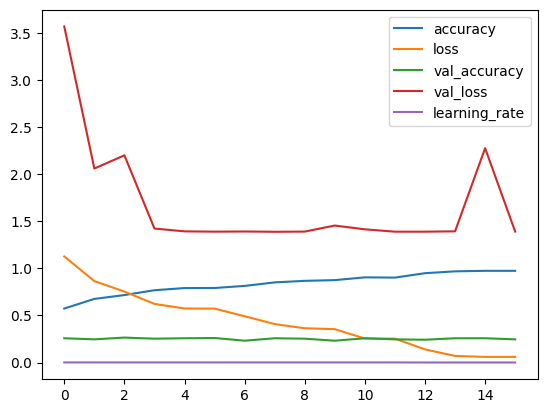

25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 152ms/step - accuracy: 0.2615 - loss: 11.6009
loss: 10.5361, accuracy: 0.2576


In [9]:
# @title 사전학습 모델 전이학습

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

early_stopping_cb = EarlyStopping(patience=8, verbose=1, restore_best_weights=True)
reduce_lr_on_plateau_cb = ReduceLROnPlateau(patience=4, factor=0.5, verbose=1)

# 학습
history = model.fit(
    tr_seq,
    epochs=30,
    validation_data=test_seq, # 검증 데이터 설정
    callbacks=[early_stopping_cb, reduce_lr_on_plateau_cb])

# 학습결과 시각화
pd.DataFrame(history.history).plot()
plt.show()

# 평가
loss, accuracy = model.evaluate(test_seq)
print(f'loss: {loss:.4f}, accuracy: {accuracy:.4f}')